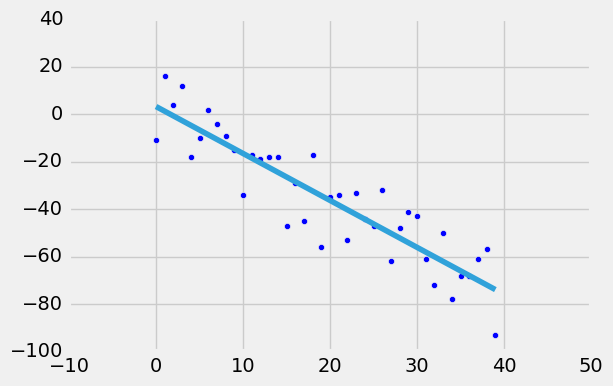

In [32]:
from statistics import mean
import numpy as np # to use arrays
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype = np.float64) #linear regression uses float 64
ys = np.array([3,6,4,2,5,7],dtype = np.float64) #dtype not necessary right now mbut may be useful if coiing back to linear regression

#plt.plot(xs,ys)
#plt.show()

# 2 algos so far, best fit and r squared
# test to make sure things are working
# create our own dataset to test things on
# change these values to try things, step and corr
def create_dataset(how_much_data, variance, step=2, correlation = False):
    val = 1 #first y value
    ys=[]
    for i in range(how_much_data):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val += step
        elif correlation and correlation =='neg':
            val -= step
            
    #xs are just a for loop
    xs = [i for i in range(len(ys))]
    return (np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64))

# dataset created and can change around and test
#correlation is either false, or 'pos' or 'neg'
xs, ys = create_dataset(40, 20, 2, correlation = 'neg')


def best_fit_slope_and_intercept(xs,ys):
    # formulas for slope and y intercept
    m = ((mean(xs)*mean(ys) - mean(xs*ys))
         /(mean(xs)**2 - (mean(xs**2))))
    b = mean(ys)-(m*mean(xs))
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

#best fit line, create a list that calculates y for each x
regression_line = [(m*x)+b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

#whole point is now uve created a model to the data
#using the model we can create a prediction

#predict y where x = 8
predict_x = 8
predict_y = (m*predict_x) + b

#showing our prediction
#plt.scatter(xs, ys)
#plt.scatter(predict_x, predict_y)
#plt.plot(xs, regression_line)
#plt.show()

#can find a best fit line to any dataset, 
#but the question is how good of a fit is this line, accuracy/confidence


In [33]:
#determining acuracy of line
# squared error, distance between y's and best fit line
# square it so we deal with positive values and so outliers are punished more
# only wanna do linear regression on linear data, dont want outliers. u can definitely punish even harder for them

#r^2 is the coefficient of determination, what u calculate
# it equals 1 - (squared error of y^ (y hat (best fit/regression line))/ SE of mean(ys (dataset ys)))

#if r^s is .8, then se(y^)/se(mean(ys)) is .2, error is small
# a good value

def squared_error(ys_og, ys_line):
    return sum((ys_line - ys_og) **2)

def coefficient_of_determination(ys_og, ys_line):
    y_mean_line = [mean(ys_og) for y in ys_og] #array of values, each value is mean of y for each y
    squared_error_y_mean = squared_error(ys_og, y_mean_line)
    
    squared_error_regr = squared_error(ys_og, ys_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

# bad result, especcially for predicting exact values
# but if just tryna predict a trend, it doesnt have to be as high

0.809191818591
